In [20]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
from wordcloud import WordCloud
pd.plotting.register_matplotlib_converters()
%matplotlib inline


MEMANGGIL DATA CSV KEDALAM DATAFRAME DENGAN PANDAS

pd.read_csv digunakan untuk memanggil file data csv ke dataframe

In [3]:
df= pd.read_csv("london_crime_by_lsoa.csv")
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
1048570,E01001649,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,E01000464,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,E01000064,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,E01004615,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7


INFO()

info() adalah metode yang digunakan untuk mengakses informasi metadata tentang DataFrame. Metode ini memberikan ringkasan informasi penting tentang DataFrame, seperti jumlah baris dan kolom, tipe data setiap kolom, serta jumlah nilai yang tidak kosong (non-null) dalam setiap kolom.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   lsoa_code       1048575 non-null  object
 1   borough         1048575 non-null  object
 2   major_category  1048575 non-null  object
 3   minor_category  1048575 non-null  object
 4   value           1048575 non-null  int64 
 5   year            1048575 non-null  int64 
 6   month           1048575 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 56.0+ MB


MEMFILTER LIMA DATA TERATAS


head() untuk menampilkan beberapa baris pertama dari DataFrame. Fungsi ini membantu Anda dengan cepat memeriksa data awal dalam DataFrame untuk memahami struktur data dan melihat contoh-contoh data di dalamnya. Secara khusus, fungsi ini biasanya digunakan untuk menampilkan lima baris pertama secara default, tetapi Anda juga dapat menentukan jumlah baris yang ingin ditampilkan dengan memberikan argumen ke dalamnya.

In [5]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


MENAMPILKAN BARIS TERAKHIR DARI DATAFRAME

tail() untuk menampilkan beberapa baris, tetapi kali ini, fungsi ini menampilkan beberapa baris terakhir dari DataFrame.

In [6]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
1048570,E01001649,Greenwich,Theft and Handling,Other Theft,3,2010,11
1048571,E01000464,Bexley,Criminal Damage,Criminal Damage To Dwelling,0,2012,3
1048572,E01000064,Barking and Dagenham,Drugs,Possession Of Drugs,1,2010,2
1048573,E01004615,Wandsworth,Criminal Damage,Other Criminal Damage,1,2016,7
1048574,E01001752,Hackney,Other Notifiable Offences,Other Notifiable,0,2008,12


MENDAPATKAN DIMENSI SEBUAH DATAFRAME

shape adalah atribut dalam pandas yang digunakan untuk mendapatkan dimensi (jumlah baris dan kolom) dari sebuah DataFrame atau array numpy.

In [7]:
df.shape

(1048575, 7)

AREA PLOT

Dari Area Plot yang dibuat menggunakan dataset kita dapat mengetahui Major Category untuk Theft and Hadling mengalami kenaikan tingkat kejahatan pada tahun 2012 dan pada 2014 mengalami penurunan tingkat kejahatannya, Violence Against the Person mengalami penurunan tingkat kejahatan pada tahun 2011 dan pada 2016 mengalami kenaikan tingkat kejahatannya, Burglary mengalami kenaikan tingkat kejahatan pada tahun 2011 namun mengalami penurunan tingkat kejahatan pada tahun 2015, Criminal Damage mengalami penurunan tingkat kejahatan pada tahun 2009 namun pada 2014 mengalami kenaikan tingkat kejahatannya, Drugs mengalami penurunan tingkat kejahatan pada tahun 2015.

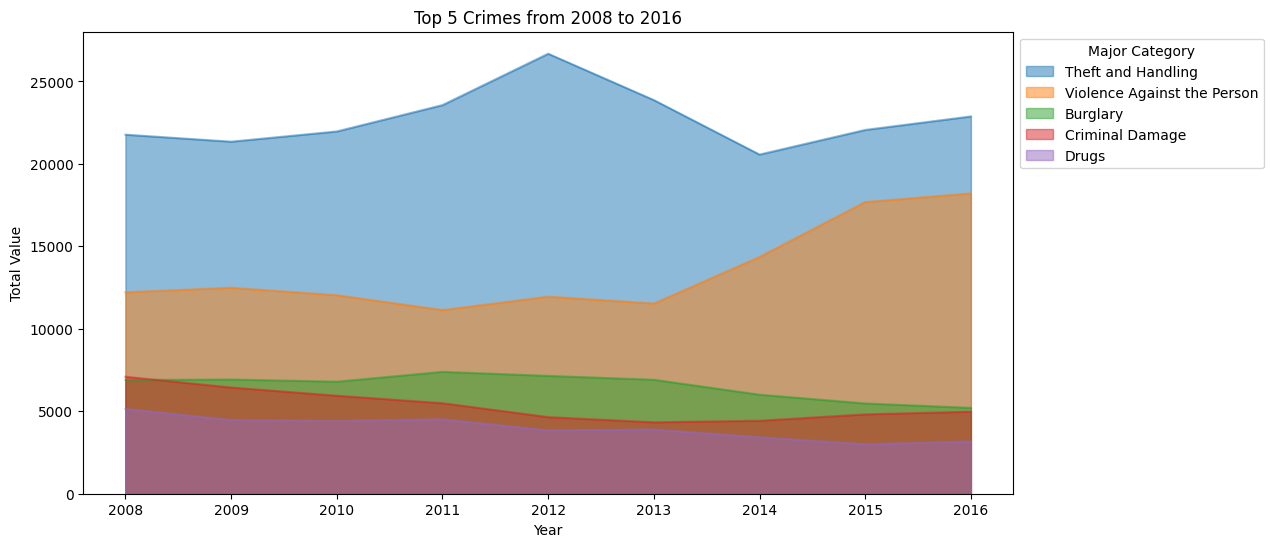

In [9]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df[(df["year"] >= 2008) & (df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Pivot tabel agar jenis kejahatan menjadi kolom
pivot_table = data_2008_to_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Filter hanya untuk 5 jenis kejahatan teratas
top_5_pivot = pivot_table[top_5_crimes['major_category']]

# Plot hasil top 5 jenis kejahatan dari tahun 2008 hingga 2016
top_5_pivot.plot(kind='area', stacked=False, figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Top 5 Crimes from 2008 to 2016')
plt.legend(title='Major Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

HISTOGRAM


Dari Histogram dibawah terdapat 14 jumlah major category untuk nilai crime 38914, 13 jumlah major category untuk nilai crime 68428, 0 jumlah major category untuk nilai crime 97942, 3 jumlah major category untuk nilai crime 127456, 4 jumlah major category untuk nilai crime 156970, 0 jumlah major category untuk nilai crime 186484, 2 jumlah major category untuk nilai crime 215998, 0 jumlah major category untuk nilai crime 245512, 6 jumlah major category untuk nilai crime 275026, 3 jumlah major category untuk nilai crime 304540.

In [10]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(top_5_pivot)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[15 12  0  5  2  0  2  3  5  1]
[ 2997.   5365.4  7733.8 10102.2 12470.6 14839.  17207.4 19575.8 21944.2
 24312.6 26681. ]


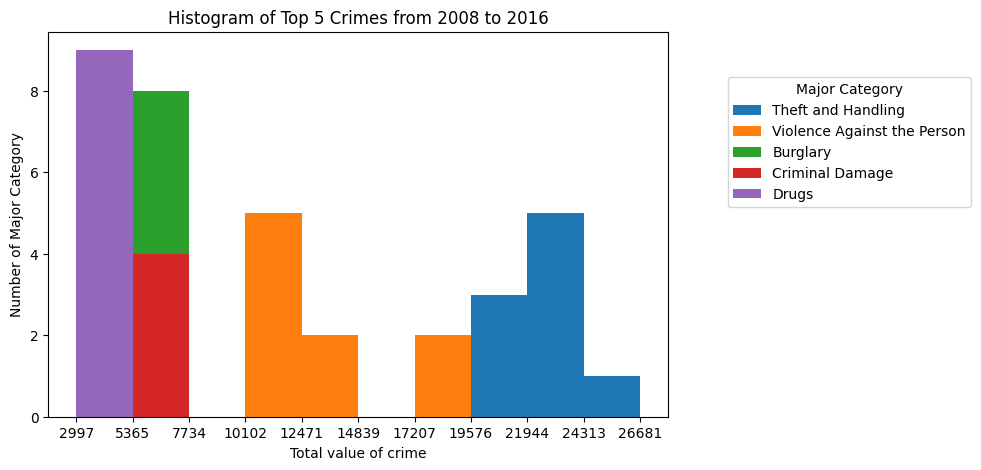

In [12]:
import matplotlib.pyplot as plt

# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df[(df["year"] >= 2008) & (df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Pivot tabel agar jenis kejahatan menjadi kolom
pivot_table = data_2008_to_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Filter hanya untuk 5 jenis kejahatan teratas
top_5_pivot = pivot_table[top_5_crimes['major_category']]

# Plot histogram untuk top 5 jenis kejahatan dari tahun 2008 hingga 2016
top_5_pivot.plot(kind='hist', figsize =(8, 5), xticks = bin_edges)
plt.xlabel('Total value of crime')
plt.ylabel('Number of Major Category')
plt.title('Histogram of Top 5 Crimes from 2008 to 2016')
plt.legend(title='Major Category', bbox_to_anchor=(1.5, 0.9), loc='upper right')
plt.show()

BARCHART

Dari data hasil visualisasi dibawah menggunakan bar charts pada tahun 2012 Major Category untuk Theft and Handling yang paling sering terjadi, pada tahun 2016 Major Category untuk Violence Against the Person yang paling sering terjadi, pada tahun 2012 Major Category untuk Burglary yang paling sering terjadi, pada tahun 2008 Major Category untuk Criminal Damage yang paling sering terjadi, pada tahun 2008 Major Category untuk Drugs yang paling sering terjadi.

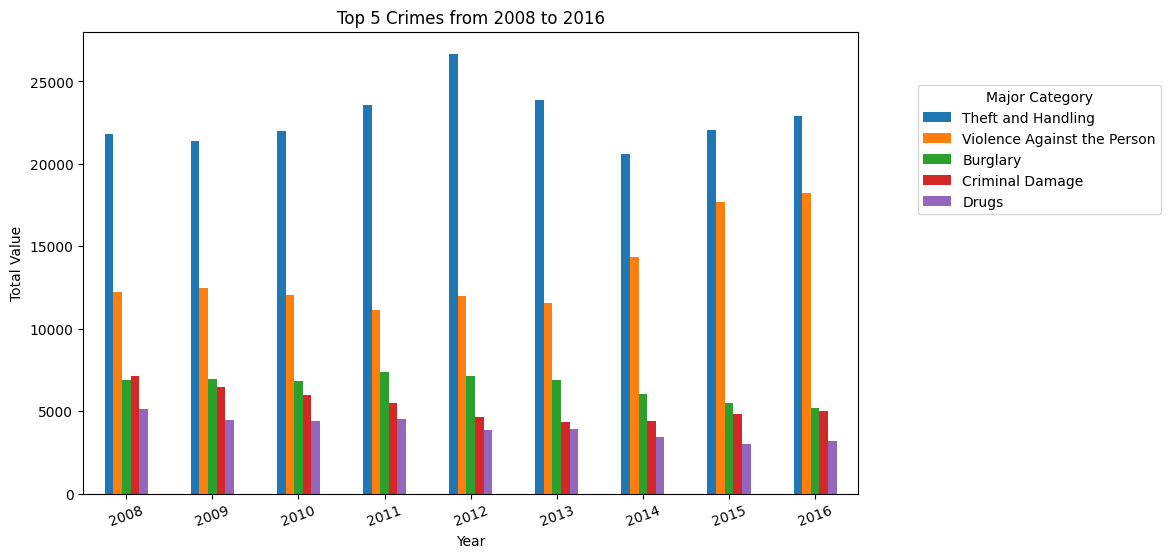

In [13]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df[(df["year"] >= 2008) & (df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Pivot tabel agar jenis kejahatan menjadi kolom
pivot_table = data_2008_to_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Filter hanya untuk 5 jenis kejahatan teratas
top_5_pivot = pivot_table[top_5_crimes['major_category']]

# Buat plot bar chart
top_5_pivot.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.title('Top 5 Crimes from 2008 to 2016')
plt.legend(title='Major Category', bbox_to_anchor=(1.4, 0.9), loc='upper right')
plt.xticks(rotation=20)  # Untuk memutar label sumbu x agar lebih mudah dibaca
plt.show()

PIE CHART

Dari pie charts dibawah Major Category tertinggi terdapat pada Theft and Handling dengan jumlah 43.8% dan yang terendah terdapat pada Drugs dengan jumlah 7.7% yang terjadi di kota london.

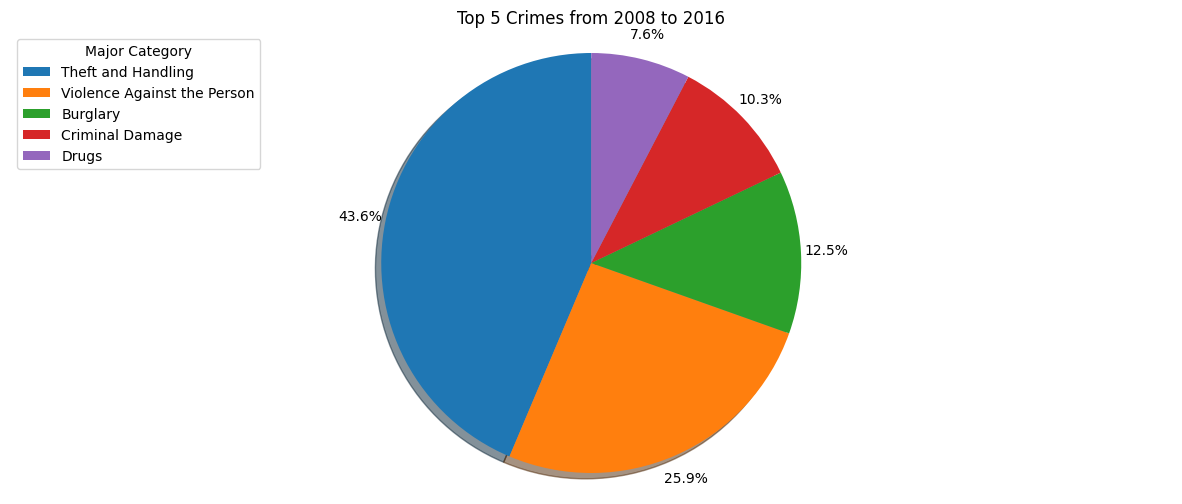

In [14]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df[(df["year"] >= 2008) & (df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Buat pie chart
plt.figure(figsize=(15, 6))
plt.pie(top_5_crimes['value'], labels=None, autopct='%1.1f%%', startangle=90, shadow=True,       
                            pctdistance=1.12,    # the ratio between the center
       )
plt.title('Top 5 Crimes from 2008 to 2016')
plt.axis('equal')  # Sets the pie chart to look like a circle.
plt.legend(title='Major Category', labels=top_5_crimes['major_category'], loc='upper left')
plt.show()

BOXPLOT

Dari Box plot data dibawah untuk major_category Theft and Handling nilai Angka tertinggi berjumlah 334054, median berjumlah 295762 , Angka terkecil berjumlah 279492. Untuk major_category Violence Against the Person nilai Angka tertinggi berjumlah 232381, median berjumlah 173120, Angka terkecil berjumlah 146181. Untuk major_category Burglary nilai Angka tertinggi berjumlah 93392, median berjumlah 83810, Angka terkecil berjumlah 68285. Untuk major_category Criminal Damage nilai Angka tertinggi berjumlah 91872, median berjumlah 70104, Angka terkecil berjumlah 56206. Untuk major_category Drugs nilai Angka tertinggi berjumlah 68804, median berjumlah 52307, Angka terkecil berjumlah 38914.

major_category  Theft and Handling  Violence Against the Person     Burglary  \
count                     9.000000                     9.000000     9.000000   
mean                  22745.888889                 13515.000000  6528.222222   
std                    1808.312365                  2671.725519   771.969847   
min                   20567.000000                 11139.000000  5207.000000   
25%                   21773.000000                 11953.000000  6006.000000   
50%                   22060.000000                 12216.000000  6892.000000   
75%                   23566.000000                 14360.000000  6929.000000   
max                   26681.000000                 18212.000000  7392.000000   

major_category  Criminal Damage        Drugs  
count                  9.000000     9.000000  
mean                5351.333333  3986.777778  
std                  963.518033   709.048972  
min                 4331.000000  2997.000000  
25%                 4646.000000  3425.000000

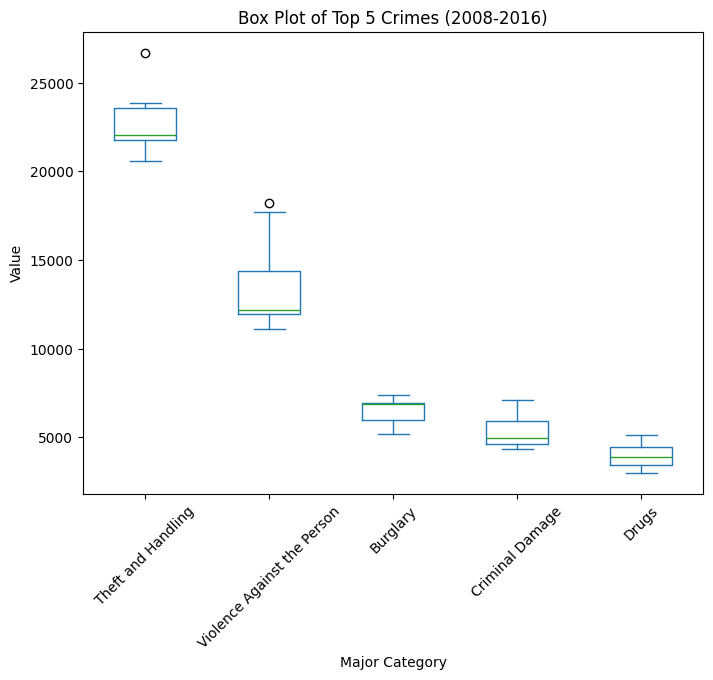

In [15]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df[(df["year"] >= 2008) & (df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan hitung total nilai (value)
total_per_crime = data_2008_to_2016.groupby('major_category')['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime.sort_values(by='value', ascending=False).head(5)

# Pivot tabel agar jenis kejahatan menjadi kolom
pivot_table = data_2008_to_2016.pivot_table(index='year', columns='major_category', values='value', aggfunc='sum')

# Filter hanya untuk 5 jenis kejahatan teratas
top_5_pivot = pivot_table[top_5_crimes['major_category']] 

# Let's view the percentages using the describe() method.
print(top_5_pivot.describe())

# Buat Box Plot
top_5_pivot.plot(kind='box', figsize=(8, 6))
plt.xlabel('Major Category')
plt.ylabel('Value')
plt.title('Box Plot of Top 5 Crimes (2008-2016)')
plt.xticks(rotation=45)
plt.show()

SCATTER PLOT

Berdasarkan Scatter plot dibawah Major Category untuk Theft and Handling mengalami kenaikan pada tahun 2012 dan mengalami penurunan pada tahun 2013, Violence Against the Person mengalami kenaikan pada tahun 2014, Burglary mengalami kenaikan pada tahun 2011 dan mengalami penurunan pada tahun 2016, Criminal Damage mengalami penurunan pada tahun 2009 dan mengalami kenaikan pada tahun 2015, Drugs mengalami penurunan pada tahun 2014.

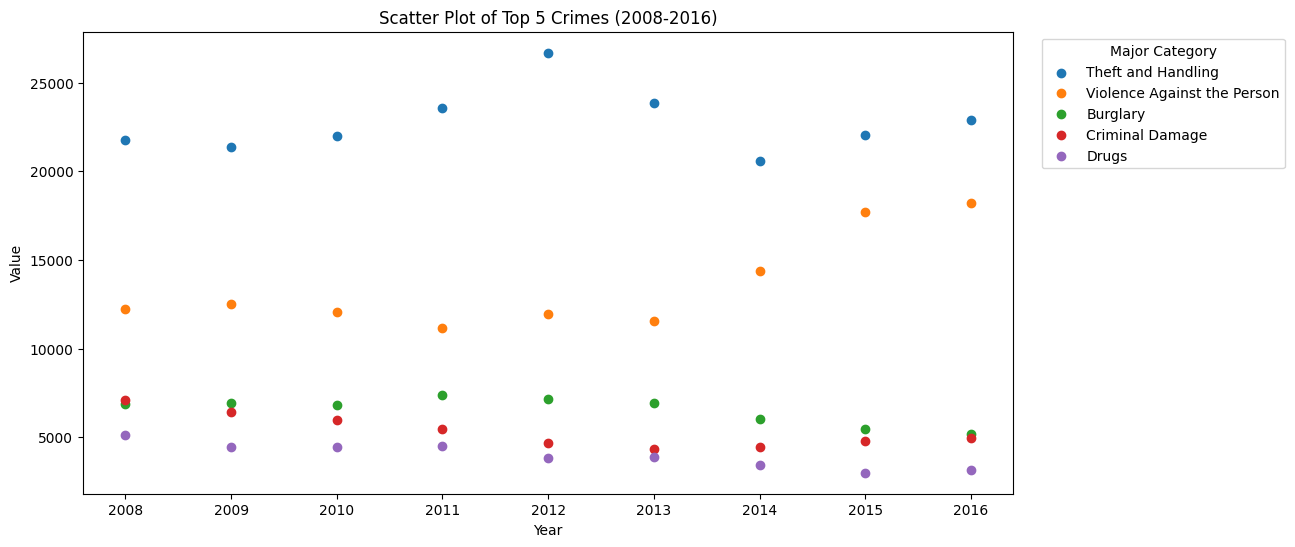

In [19]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df[(df["year"] >= 2008) & (df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan tahun, dan hitung total nilai (value)
total_per_crime_year = data_2008_to_2016.groupby(['major_category', 'year'])['value'].sum().reset_index()

# Urutkan DataFrame berdasarkan total nilai
top_5_crimes = total_per_crime_year.groupby('major_category')['value'].sum().nlargest(5).index

# Buat scatter plot untuk lima jenis kejahatan teratas
plt.figure(figsize=(12, 6))

for crime_type in top_5_crimes:
    crime_data = total_per_crime_year[total_per_crime_year['major_category'] == crime_type]
    plt.scatter(crime_data['year'], crime_data['value'], label=crime_type)

# Buat Scatter Plot
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Scatter Plot of Top 5 Crimes (2008-2016)')
plt.legend(title='Major Category', bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

WORDCLOUD

Dari hasil dibawah menghasilkan Word Cloud yang memvisualisasikan jenis-jenis kejahatan yang terjadi di London antara tahun 2008 hingga 2016. Semakin besar kata-kata dalam Word Cloud, semakin sering jenis kejahatan tersebut terjadi selama periode tersebut. Data terbanyak terdiri dari Notifiable Offences, Criminal Damage, Sexual Offences.

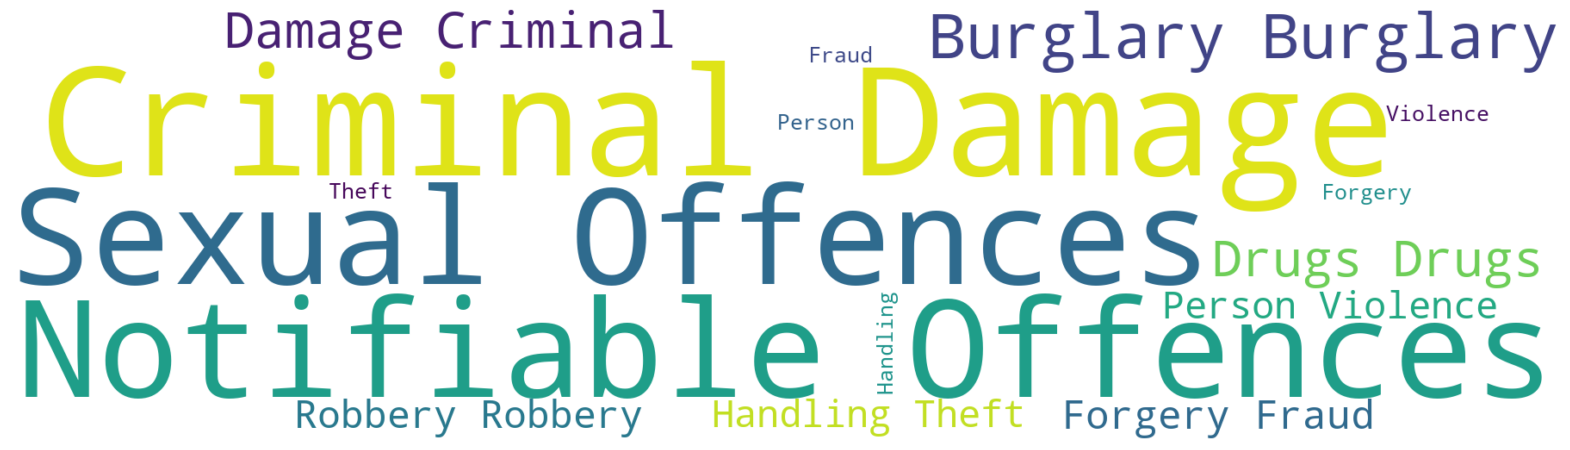

In [22]:
# Filter data untuk tahun 2008-2016
data_2008_to_2016 = df[(df["year"] >= 2008) & (df["year"] <= 2016)]

# Kelompokkan data berdasarkan jenis kejahatan (major_category) dan tahun, dan hitung total nilai (value)
total_per_crime_year = data_2008_to_2016.groupby(['major_category', 'year'])['value'].sum().reset_index()

# Gabungkan deskripsi jenis kejahatan
crime_description = ' '.join(total_per_crime_year['major_category'])

# Membuat Word Cloud
wordcloud = WordCloud(width=1800, height = 500, background_color='white').generate(crime_description)

# Menampilkan Word Cloud
plt.figure(figsize=(20, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

FOLIUM MAP

untuk membuat berbagai jenis peta leaflet

In [23]:
# Membuat objek peta dengan koordinat pusat London
london_center = [51.5074, -0.1278]
london_map = folium.Map(location=london_center, zoom_start=12)

# Menambahkan marker sebagai contoh
folium.Marker(london_center, tooltip='London Center').add_to(london_map)

#Menampilkan Map
london_map